# Sport Image Classification (Using Convolutional Neural Network)

Collection of 100 different sport images. Total of 13572 samples. The classes are nearly balanced, number of samples for each class varies ~100-170

### Importing Libraries

In [1]:
import numpy as np
import os
from keras import layers
from keras import models
from keras import optimizers
from keras import metrics
import tensorflow as tf 
import matplotlib.pyplot as plt

### Getting image directories for train and validation sets

In [2]:
train_directory = '../../Data/TrainSet'
valid_directory = '../../Data/ValidSet'

In [3]:
train_directory

'../../Data/TrainSet'

In [4]:
for folder in os.listdir(train_directory):
    print(folder + ' -> ' + str(len([name for name in os.listdir('../../Data/TrainSet/'+str(folder))])))

air hockey -> 112
ampute football -> 112
archery -> 132
arm wrestling -> 99
axe throwing -> 113
balance beam -> 152
barell racing -> 123
baseball -> 174
basketball -> 169
baton twirling -> 108
bike polo -> 111
billiards -> 145
bmx -> 140
bobsled -> 138
bowling -> 120
boxing -> 116
bull riding -> 149
bungee jumping -> 125
canoe slamon -> 164
cheerleading -> 132
chuckwagon racing -> 120
cricket -> 130
croquet -> 136
curling -> 141
disc golf -> 123
fencing -> 135
field hockey -> 158
figure skating men -> 146
figure skating pairs -> 151
figure skating women -> 159
fly fishing -> 134
football -> 191
formula 1 racing -> 191
frisbee -> 133
gaga -> 118
giant slalom -> 151
golf -> 157
hammer throw -> 122
hang gliding -> 122
harness racing -> 147
high jump -> 159
hockey -> 172
horse jumping -> 137
horse racing -> 139
horseshoe pitching -> 102
hurdles -> 137
hydroplane racing -> 108
ice climbing -> 130
ice yachting -> 112
jai alai -> 132
javelin -> 136
jousting -> 118
judo -> 150
lacrosse -> 151


# Creating the model

### Initial run

An initial run with 13 layers (5 Convolutional layers, 5 Pooling, 2 Fully Connected Layers and 1 Output Layer)



In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', padding="same", input_shape=(224,224,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu', padding="same"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu', padding="same"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(256, (3,3), activation = 'relu',padding="same"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(256, (3,3), activation = 'relu',padding="same"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation = 'relu'))
model.add(layers.Dense(1024, activation = 'relu'))
model.add(layers.Dense(100,activation = 'softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [7]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),metrics=metrics.metrics.categorical_accuracy)

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


## Data Preprocessing

#### Reading Images

In [8]:
from keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(224,224),
    batch_size=64,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    valid_directory,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

Found 13572 images belonging to 100 classes.
Found 500 images belonging to 100 classes.


In [11]:
import pickle

In [12]:
for data_batch, label_batch in train_generator:
    print('databatch shape:', data_batch.shape)
    print('labelbatch shape:',label_batch.shape)
    break

databatch shape: (64, 224, 224, 3)
labelbatch shape: (64, 100)


In [13]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 212,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 15
)

<ipython-input-13-3a50133fa9f3>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
212/212 [==============================] - 1115s 5s/step - loss: 4.0854 - categorical_accuracy: 0.0700 - val_loss: 3.5833 - val_categorical_accuracy: 0.1292
Epoch 2/30
212/212 [==============================] - 1095s 5s/step - loss: 3.3013 - categorical_accuracy: 0.1956 - val_loss: 2.9596 - val_categorical_accuracy: 0.2792
Epoch 3/30
212/212 [==============================] - 1095s 5s/step - loss: 2.7540 - categorical_accuracy: 0.3081 - val_loss: 2.5342 - val_categorical_accuracy: 0.3562
Epoch 4/30
212/212 [==============================] - 1096s 5s/step - loss: 2.2877 - categorical_accuracy: 0.4106 - val_loss: 2.2452 - val_categorical_accuracy: 0.4333
Epoch 5/30
212/212 [==============================] - 1100s 5s/step - loss: 1.8674 - categorical_accuracy: 0.5070 - val_loss: 2.2610 - val_categorical_accuracy: 0.3896
Epoch 6/30
212/212 [==============================] - 1097s 5s/step - loss: 1.4819 - categorical_accuracy: 0.5973 - val_loss: 1.9480 - val_categorical_accuracy:

In [14]:
model.save('model3.h5')

In [18]:
history.history

{'loss': [4.085418224334717,
  3.30129075050354,
  2.7539560794830322,
  2.2876532077789307,
  1.8674383163452148,
  1.481881856918335,
  1.0761200189590454,
  0.6988825798034668,
  0.40994009375572205,
  0.24685075879096985,
  0.16484150290489197,
  0.13297966122627258,
  0.11147819459438324,
  0.08305584639310837,
  0.07573376595973969,
  0.06891817599534988,
  0.06455082446336746,
  0.04961834102869034,
  0.05655442178249359,
  0.052459679543972015,
  0.04669056087732315,
  0.035320281982421875,
  0.036682531237602234,
  0.0331759974360466,
  0.02770785614848137,
  0.03176191449165344,
  0.030174730345606804,
  0.024340370669960976,
  0.030509566888213158,
  0.026674456894397736],
 'categorical_accuracy': [0.06995854526758194,
  0.19558779895305634,
  0.3081137239933014,
  0.41057151556015015,
  0.5070328712463379,
  0.5972756743431091,
  0.699215292930603,
  0.803375780582428,
  0.8826621174812317,
  0.9261918663978577,
  0.9524726271629333,
  0.9615042805671692,
  0.96920341253280

In [17]:
with open('./trainHistoryDict', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

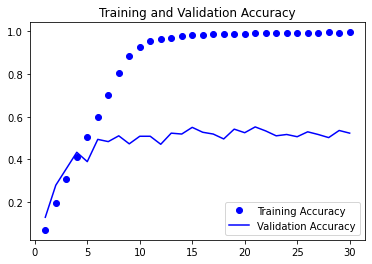

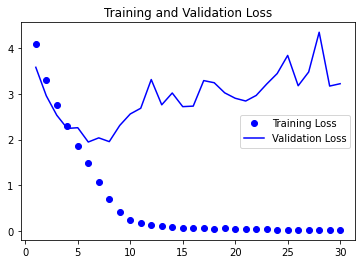

In [19]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()